<a href="https://colab.research.google.com/github/Petint/AI-and-DS/blob/main/The%20LGBT%20project/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The LGBT project
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 5000 480">
  <path fill="#750787" d="M0 0h777v480H0z"/>
  <path fill="#004dff" d="M0 0h777v400H0z"/>
  <path fill="#008026" d="M0 0h777v320H0z"/>
  <path fill="#ffed00" d="M0 0h777v240H0z"/>
  <path fill="#ff8c00" d="M0 0h777v160H0z"/>
  <path fill="#e40303" d="M0 0h777v80H0z"/>
</svg>

## The dataset
> FRA (Fundamental Rights Agency) conducted an online survey to identify how lesbian, gay, bisexual and transgender (LGBT) people living in the European Union and Croatia experience the fulfilment of their fundamental rights. The evidence produced by the survey will support the development of more effective laws and policies to fight discrimination, violence and harassment, improving equal treatment across society. The need for such an EU-wide survey became evident after the publication in 2009 of the first FRA report on homophobia and discrimination on grounds of sexual orientation or gender identity, which highlighted the absence of comparable data. The European Commission then requested FRA to collect comparable data across the EU on this issue. FRA organised the data collection in the form of an online survey covering all EU Member States and Croatia. The respondents were persons aged 18 years and over, who identify themselves as lesbian, gay, bisexual or transgender, anonymously. The survey was made available online, from April to July 2012, in all 23 official EU languages (except Irish) plus Catalan, Croatian, Luxembourgish, Russian and Turkish. In total, 93,079 LGBT persons completed the survey. FRA’s inhouse experts designed the survey which was implemented by Gallup, one of the market leaders in large-scale surveys. In addition, civil society organisations including ILGA-Europe (European Region of the International Lesbian, Gay, Bisexual, Trans and Intersex Association) and Transgender Europe (TGEU) provided advice on how to best approach LGBT people.<br><br>Source: [kaggle]("https://www.kaggle.com/datasets/ruslankl/european-union-lgbt-survey-2012")

In [11]:
# Basic
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
#import geoplotlib as geo

from sklearn.preprocessing import MinMaxScaler

import os
files = ["https://raw.githubusercontent.com/Petint/AI-and-DS/main/The%20LGBT%20project/raw_data/LGBT_Survey_DailyLife.csv", "https://raw.githubusercontent.com/Petint/AI-and-DS/main/The%20LGBT%20project/raw_data/LGBT_Survey_Discrimination.csv",
         "https://raw.githubusercontent.com/Petint/AI-and-DS/main/The%20LGBT%20project/raw_data/LGBT_Survey_RightsAwareness.csv", "https://raw.githubusercontent.com/Petint/AI-and-DS/main/The%20LGBT%20project/raw_data/LGBT_Survey_SubsetSize.csv",
         "https://raw.githubusercontent.com/Petint/AI-and-DS/main/The%20LGBT%20project/raw_data/LGBT_Survey_TransgenderSpecificQuestions.csv", "https://raw.githubusercontent.com/Petint/AI-and-DS/main/The%20LGBT%20project/raw_data/LGBT_Survey_ViolenceAndHarassment.csv"]


In [12]:
pd.set_option('display.max_colwidth', None) #Dispaly full questions

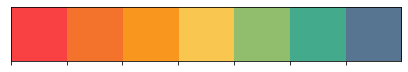

In [13]:
#Colors to be used in the plots
colors=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(colors)

## Load data
* Opening files
* Exploring data

In [14]:
life_df = pd.read_csv(files[0])
life_df.shape

(34020, 7)

In [15]:
life_df.head()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive language about lesbian, gay, bisexual and/or transgender people by politicians in the country where you live?",Very widespread,8,NaN
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive language about lesbian, gay, bisexual and/or transgender people by politicians in the country where you live?",Fairly widespread,34,NaN
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive language about lesbian, gay, bisexual and/or transgender people by politicians in the country where you live?",Fairly rare,45,NaN
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive language about lesbian, gay, bisexual and/or transgender people by politicians in the country where you live?",Very rare,9,NaN
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive language about lesbian, gay, bisexual and/or transgender people by politicians in the country where you live?",Don`t know,4,[0]


In [16]:
# Display all the questions
life_df.question_label.unique()

array(['In your opinion, how widespread is offensive language about lesbian, gay, bisexual and/or transgender people by politicians in the country where you live?',
       'In your opinion, how widespread are casual jokes in everyday life about lesbian, gay, bisexual and/or transgender people in the country you live?',
       'In your opinion, how widespread are expressions of hatred and aversion towards lesbian, gay, bisexual and/or transgender in public in the country where you live?',
       'In your opinion, how widespread are assaults and harassment against lesbian, gay, bisexual and/or transgender people in the country where you live?',
       'In your opinion, how widespread is same-sex partners holding hands in public in the country where you live?',
       'In your opinion, how widespread is heterosexual partners holding hands in public in the country where you live?',
       'In your opinion, how widespread is public figures in politics, business, sports, etc being open about

In [17]:
life_df.question_code.unique()

array(['b1_a', 'b1_b', 'b1_c', 'b1_d', 'b1_e', 'b1_f', 'b1_g', 'b1_h',
       'b1_i', 'b2_a', 'b2_b', 'b2_c', 'b2_d', 'b2_e', 'b2_f', 'b2_g',
       'b2_h', 'b2_i', 'c1a_a', 'c1a_b', 'c1a_c', 'c1a_d', 'c1_b', 'c1_c',
       'g1_a', 'g2_a', 'g2_b', 'g2_c', 'g2_d', 'g3_a', 'g3_b', 'g3_c',
       'g3_d', 'g3_e', 'g3_f', 'g3_g', 'g4_a', 'g4_b', 'g4_c', 'g5',
       'h10', 'h11', 'h14', 'h15', 'h16', 'h9', 'h9_1', 'h9_2', 'i1',
       'open_at_school', 'open_at_work', 'openness_cat4'], dtype=object)

###### The questions seems to be organized into categories.

In [18]:
life_df.answer.unique()

array(['Very widespread', 'Fairly widespread', 'Fairly rare', 'Very rare',
       'Don`t know', 'Strongly agree', 'Agree', 'Disagree',
       'Strongly disagree', 'Current situation is fine', 'Yes', 'No',
       'I do not have a partner (Does not apply to me)', 'None', 'A few',
       'Most', 'All', 'Never happened in the last sixth months',
       'Happened only once in the last six months',
       '2-5 times in the last six months',
       '6 times or more in the last six months', '1', '10', '2', '3', '4',
       '5', '6', '7', '8', '9', 'Single',
       'Married/in a registered partnership', 'Divorced', 'Separated',
       'Widowed', 'Living together with a partner /spouse',
       'Involved in a relationship without living together',
       'Have no relationship / do not have a partner',
       'I did not need or use any benefits or services',
       'An ethnic minority (including of migrant background)',
       'A sexual minority',
       'A minority in terms of disability (exclud

In [19]:
life_df.loc[life_df.question_code.str.contains("b1")].answer.unique()

array(['Very widespread', 'Fairly widespread', 'Fairly rare', 'Very rare',
       'Don`t know'], dtype=object)

###### Each category seem to have it's set of possible answers

In [20]:
life_df.CountryCode.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic',
       'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain', 'Finland',
       'France', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia',
       'United Kingdom', 'Average'], dtype=object)

28 countries + 1 Average

Total amount of categories: 29 countries x5 subsets x4 question_code x5 answer = 725 rows

In [21]:
life_df.isnull().sum()

CountryCode           0
subset                0
question_code         0
question_label        0
answer                0
percentage            0
notes             18724
dtype: int64

In [22]:
life_df.notes.unique()


array([nan, '[0]', ' [1] '], dtype=object)

The column "notes" doesn't seem to hold any significant value. We can drop it.

In [23]:
life_df = life_df.drop("notes", axis=1)
life_df.shape

(34020, 6)

In [24]:
life_df.dtypes

CountryCode       object
subset            object
question_code     object
question_label    object
answer            object
percentage        object
dtype: object

"percentage" should be a number

In [25]:
life_df.percentage.unique()

array(['8', '34', '45', '9', '4', '21', '52', '20', '29', '48', '6', '5',
       '47', '25', '51', '13', '2', '12', '33', '1', '7', '40', '36',
       '43', '42', '31', '32', '14', '18', '3', '39', '37', '17', '38',
       '26', '24', '27', '30', '28', ':', '46', '19', '49', '11', '60',
       '59', '22', '41', '50', '15', '0', '35', '44', '10', '23', '16',
       '55', '61', '63', '56', '54', '64', '53', '67', '57', '72', '66',
       '69', '68', '65', '58', '62', '88', '75', '90', '81', '85', '70',
       '91', '80', '76', '86', '79', '89', '77', '78', '73', '71', '87',
       '83', '74', '82', '84', '92', '93', '94', '95', '98', '96', '97',
       '100', '99'], dtype=object)

In [26]:
# Clean & Convert
life_df.percentage = life_df.percentage.replace(":", 0)
life_df.percentage = life_df.percentage.astype(int)

## Openess
### Category G1

In [27]:
g1_df = life_df.loc[life_df.question_code.str.contains("g1")]
g1_df.shape

(580, 6)

In [28]:
g1_df.question_label.unique()

array(['Does your current partner know that you are L, G, B or T?'],
      dtype=object)

In [29]:
g1_df.answer.unique()

array(['Yes', 'No', 'I do not have a partner (Does not apply to me)',
       'Don`t know'], dtype=object)

In [30]:
g1_df['score'] = np.zeros

<ipython-input-30-b282c47f0ac9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1_df['score'] = np.zeros


In [31]:
g1_df.dtypes

CountryCode       object
subset            object
question_code     object
question_label    object
answer            object
percentage         int64
score             object
dtype: object

In [32]:
g1_df.percentage = g1_df.percentage.replace(":", 0)  # dropna
g1_df.percentage = g1_df.percentage.astype(int) # Cast to int

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
# Define scoring for g1
scoring_g1 = {"Yes": 1,
              "No": -1,
              "I do not have a partner (Does not apply to me)": 0,
              "Don`t know": 0.5}

# Apply scoring g1
g1_df['score'] = g1_df.answer.map(scoring_g1).mul(g1_df.percentage)
g1_df = g1_df.drop('percentage', axis=1)

<ipython-input-33-d49c6fda4c77>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1_df['score'] = g1_df.answer.map(scoring_g1).mul(g1_df.percentage)


In [34]:
g1_df.head()

,CountryCode,subset,question_code,question_label,answer,score
17139,Austria,Lesbian,g1_a,"Does your current partner know that you are L, G, B or T?",Yes,75.0
17140,Austria,Lesbian,g1_a,"Does your current partner know that you are L, G, B or T?",No,-0.0
17141,Austria,Lesbian,g1_a,"Does your current partner know that you are L, G, B or T?",I do not have a partner (Does not apply to me),0.0
17142,Austria,Lesbian,g1_a,"Does your current partner know that you are L, G, B or T?",Don`t know,0.0
17143,Austria,Gay,g1_a,"Does your current partner know that you are L, G, B or T?",Yes,60.0


In [35]:
g1_df = g1_df.loc[g1_df.subset.str.contains('Bisexual men|Bisexual women')]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


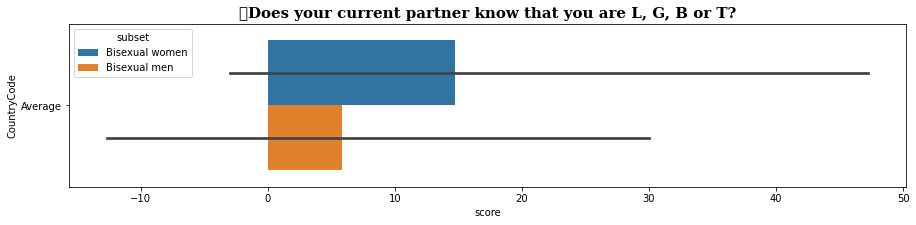

In [36]:
fig=plt.figure(figsize=(15,3))
plt.title("	Does your current partner know that you are L, G, B or T?",family='Serif', weight='bold', size=15)
ax = sns.barplot(x='score', y='CountryCode', hue='subset', data=g1_df.loc[g1_df.CountryCode.str.contains('Average')])

In [37]:
g1_df.groupby('subset').mean().round(2)

,score
subset,
Bisexual men,6.05
Bisexual women,13.19


In [38]:
g1_df_c = g1_df.groupby('CountryCode').mean()

In [39]:
scaler = MinMaxScaler()

g1_df_c['score_s'] = scaler.fit_transform(g1_df_c[['score']])

In [40]:
np.std(g1_df_c)

score      3.327205
score_s    0.216404
dtype: float64

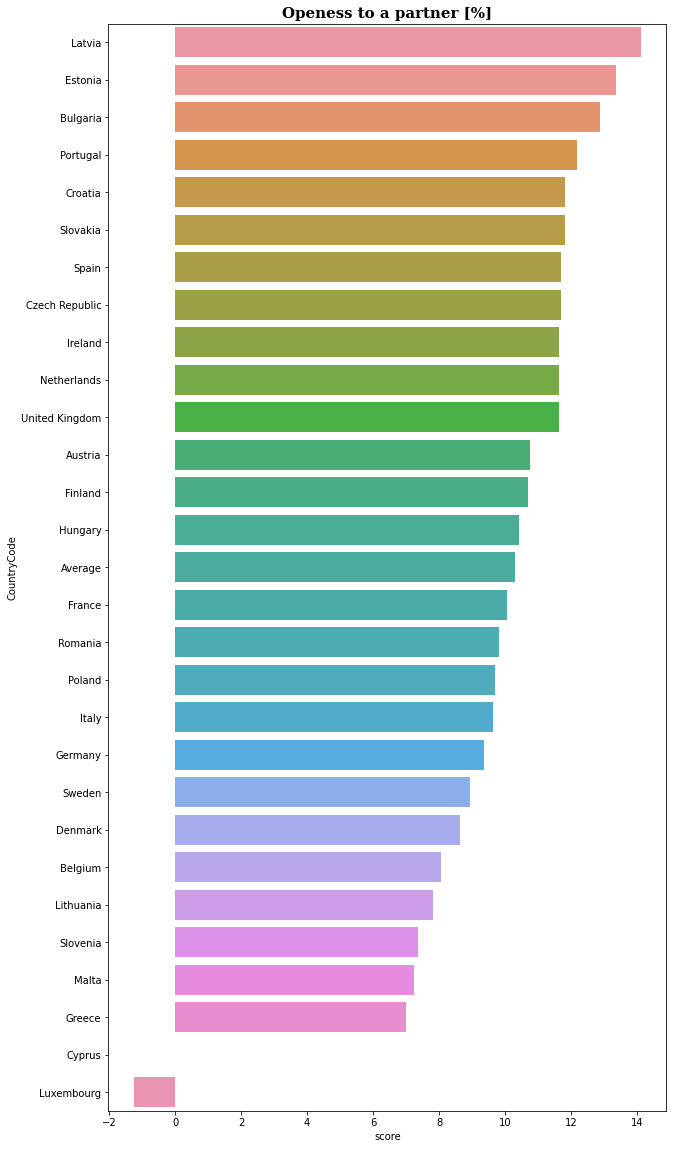

In [41]:
fig=plt.figure(figsize=(10,20))
plt.title("Openess to a partner [%]",family='Serif', weight='bold', size=15)
ax = sns.barplot(x='score', y='CountryCode', data=g1_df_c.sort_values('score', ascending=False).reset_index())

## Category G3

In [42]:
g3_df = life_df.loc[life_df.question_code.str.contains("g3")]
g3_df.shape

(4060, 6)

In [43]:
g3_df.question_label.unique()

array(['To how many people among the following groups are you open about yourself being L, G, B or T? Family members (other than your partner(s))?',
       'To how many people among the following groups are you open about yourself being L, G, B or T ? Friends ?',
       'To how many people among the following groups are you open about yourself being L, G, B or T? Neighbours ?',
       'To how many people among the following groups are you open about yourself being L, G, B or T? Work colleagues / schoolmates?',
       'To how many people among the following groups are you open about yourself being L, G, B or T? Immediate superior/head of department',
       'To how many people among the following groups are you open about yourself being L, G, B or T? Customers, clients, etc at work?',
       'To how many people among the following groups are you open about yourself being L, G, B or T? Medical staff / health care providers?'],
      dtype=object)

In [44]:
g3_df.answer.unique()

array(['None', 'A few', 'Most', 'All'], dtype=object)

In [45]:
# Define scoring for g3
scoring_g3 = {
            "None": 0,
            "A few": 0.33,
            "Most": 0.66,
            "All": 1
             }

# Apply scoring g3
g3_df['score'] = g3_df.answer.map(scoring_g3).mul(g3_df.percentage)
g3_df = g3_df.drop('percentage', axis=1)

<ipython-input-45-b250c1209ec5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g3_df['score'] = g3_df.answer.map(scoring_g3).mul(g3_df.percentage)


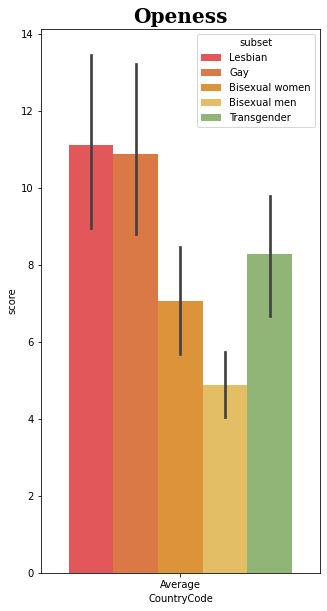

In [46]:
fig=plt.figure(figsize=(5,10))
plt.title("Openess",family='Serif', weight='bold', size=20)
ax = sns.barplot(x='CountryCode', y='score', hue='subset', 
                 data=g3_df.loc[g3_df.CountryCode.str.contains('Average')], ci=68, palette=colors)

In [47]:
g3_df.loc[g3_df.subset.str.contains('Gay|Bisexual men')].groupby('subset').mean().round(2)

,score
subset,
Bisexual men,4.31
Gay,10.01


In [48]:
res = g3_df.loc[g3_df.subset.str.contains('Bisexual men|Bisexual women')].mean() / g3_df.loc[g3_df.subset.str.contains('Gay|Lesbian')].mean()
print("Bisexual people are less open about theirs sexuality by", (res*100).round(2))

Bisexual people are less open about theirs sexuality by score    52.44
dtype: float64


<ipython-input-48-7887bcb40349>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res = g3_df.loc[g3_df.subset.str.contains('Bisexual men|Bisexual women')].mean() / g3_df.loc[g3_df.subset.str.contains('Gay|Lesbian')].mean()


In [49]:
g3_df_c = g3_df.groupby('CountryCode').mean()
np.std(g3_df_c)

score    2.772045
dtype: float64

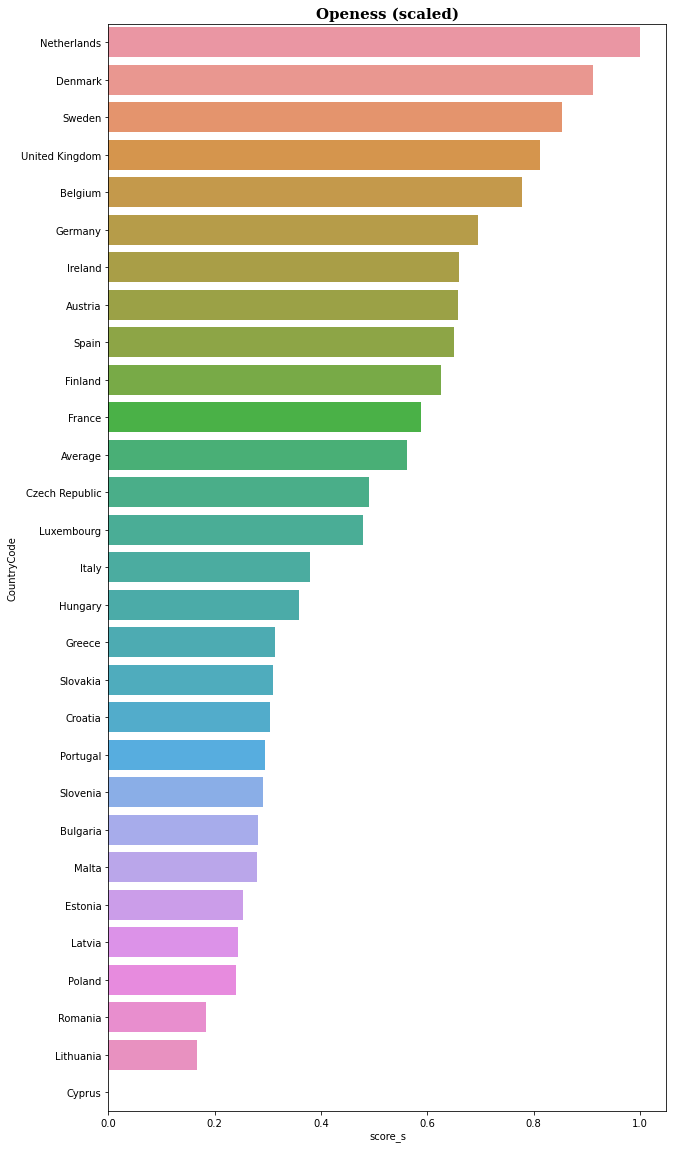

In [50]:
scaler = MinMaxScaler()

g3_df_c['score_s'] = scaler.fit_transform(g3_df_c[['score']])
fig=plt.figure(figsize=(10,20))
plt.title("Openess (scaled)",family='Serif', weight='bold', size=15)
ax = sns.barplot(x='score_s', y='CountryCode', data=g3_df_c.sort_values('score_s', ascending=False).reset_index())

## B1 category

In [51]:
b1_df = life_df.loc[life_df.question_code.str.contains("b1")]
b1_df.shape

(6525, 6)

In [52]:
b1_df.question_label.unique()

array(['In your opinion, how widespread is offensive language about lesbian, gay, bisexual and/or transgender people by politicians in the country where you live?',
       'In your opinion, how widespread are casual jokes in everyday life about lesbian, gay, bisexual and/or transgender people in the country you live?',
       'In your opinion, how widespread are expressions of hatred and aversion towards lesbian, gay, bisexual and/or transgender in public in the country where you live?',
       'In your opinion, how widespread are assaults and harassment against lesbian, gay, bisexual and/or transgender people in the country where you live?',
       'In your opinion, how widespread is same-sex partners holding hands in public in the country where you live?',
       'In your opinion, how widespread is heterosexual partners holding hands in public in the country where you live?',
       'In your opinion, how widespread is public figures in politics, business, sports, etc being open about

In [53]:
b1_df.question_code.unique()

array(['b1_a', 'b1_b', 'b1_c', 'b1_d', 'b1_e', 'b1_f', 'b1_g', 'b1_h',
       'b1_i'], dtype=object)

Tolerance

In [54]:
b1_df1 = b1_df.loc[b1_df.question_code.str.contains("b1_a|b1_b|b1_c|b1_d")]
b1_df1.shape

(2900, 6)

In [55]:
# Define scoring for b1_a to b1_d
scoring_b1_df1 = {"Very widespread": -1,
           "Fairly widespread": -0.5,
           "Fairly rare": 0.5,
           "Very rare": 1,
           "Don`t know": 0}

# Apply scoring
b1_df1['score'] = b1_df1.answer.map(scoring_b1_df1).mul(b1_df1.percentage)
b1_df1 = b1_df1.drop('percentage', axis=1)

<ipython-input-55-230f8f9e1d3f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1_df1['score'] = b1_df1.answer.map(scoring_b1_df1).mul(b1_df1.percentage)


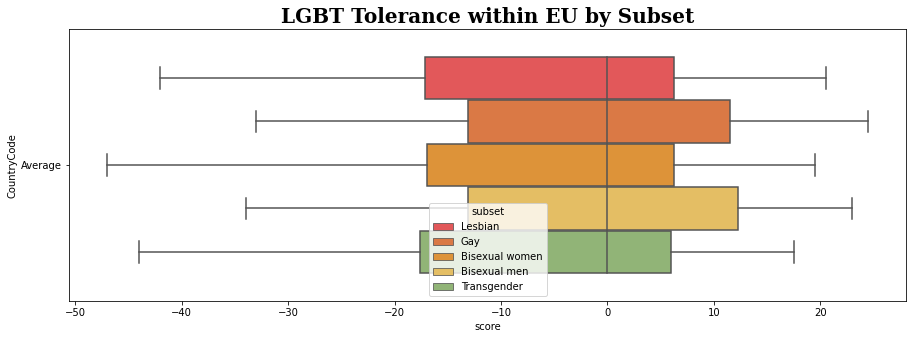

In [56]:
# Plot the dataframe
fig=plt.figure(figsize=(15,5))
plt.title("LGBT Tolerance within EU by Subset",family='Serif', weight='bold', size=20)
ax = sns.boxplot(x='score', y='CountryCode', hue='subset',
                 data=b1_df1.loc[b1_df1.CountryCode == 'Average'], palette=colors)